In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_train_a = pd.read_csv('../data/osa_train_a.csv')
raw_test_a = pd.read_csv('../data/osa_test_a.csv')
data_a = pd.concat([raw_train_a, raw_test_a], axis=0)
data_a.drop('ID', axis=1, inplace=True)
data_a.head()

,sex,age,height,weight,BMI,Time in Bed(min),Total sleep time(min),Sleep latency(min),N2 sleep latency(min),REM sleep latency(min),...,ODI,90%ODI,EtCO2 (>50mmHg),Total LMI =PLMI(/h),Total LM Arousal#,Total LM AI(/h),PLM Arousal#,PLM AI(/h),MAI(/h),OSA
0,0,38,173.0,88.0,29.4,448.9,434.5,5.5,4.0,85.0,...,62.6,47.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,54,156.0,49.0,20.1,476.0,426.0,3.0,2.5,76.0,...,2.4,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,62,164.0,67.0,24.9,435.5,351.0,3.5,1.0,74.0,...,7.4,0.3,0.0,16.8,9.0,1.5,0.0,0.0,1.5,1
3,0,33,175.0,106.0,34.6,404.5,374.5,7.0,3.5,133.0,...,19.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0,56,164.0,72.0,26.8,359.5,236.5,12.5,11.0,183.5,...,70.5,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [3]:
raw_train_b = pd.read_csv('../data/osa_train_b.csv')
raw_test_b = pd.read_csv('../data/osa_test_b.csv')
data_b = pd.concat([raw_train_b, raw_test_b], axis=0)
data_b.drop('ID', axis=1, inplace=True)
data_b.head()

,sex,age,height,weight,BMI,Time in Bed(min),Total sleep time(min),Sleep latency(min),REM sleep latency(min),NON REM/TST(%),...,Lateral A+H+RERA_ Index(h),REM A+H+RERA Index(/h),NREM A+H+RERA Index(/h),Apnea_Max_ Length(sec),Hypopnea_Max_ Length(sec),Resp. Arousal /(A+H)(%),ODI,90%ODI,EtCO2 (>50mmHg),OSA
0,0,39,170.0,65.0,22.5,480.5,435.0,2.5,63.0,80.9,...,4.2,11.6,8.2,0.0,69.2,87.9,2.3,0.0,0.0,1
1,0,41,172.0,77.0,26.0,338.5,187.0,3.0,86.5,87.7,...,0.0,41.7,19.8,83.4,101.6,38.2,23.7,5.5,0.0,1
2,0,64,166.0,69.0,25.0,450.0,376.0,8.0,62.0,83.8,...,20.7,54.1,42.5,57.4,112.9,79.9,31.9,8.3,0.0,1
3,1,58,157.0,56.0,22.7,394.0,371.0,1.0,188.5,79.1,...,0.0,51.9,32.1,47.0,62.7,19.2,33.0,8.1,0.0,1
4,1,29,154.0,50.0,21.1,278.0,252.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [42]:
# 호흡장애지수(데이터에서는 'Total_A+H+RERA_ Index(/h)')는 결측치가 존재하지 않으므로 정확한 수를 알아보기 위해 data b를 이용함
data_b['severity_by_RDI'] = '-'

data_b.loc[data_b['Total_A+H+RERA_ Index(/h)'] < 5.0, 'severity_by_RDI'] = "normal"
data_b.loc[(data_b['Total_A+H+RERA_ Index(/h)'] >= 5.0) & (data_b['Total_A+H+RERA_ Index(/h)'] < 15.0), 'severity_by_RDI'] = "mild"
data_b.loc[(data_b['Total_A+H+RERA_ Index(/h)'] >= 15.0) & (data_b['Total_A+H+RERA_ Index(/h)'] <= 30.0), 'severity_by_RDI'] = "moderate"
data_b.loc[data_b['Total_A+H+RERA_ Index(/h)'] > 30.0, 'severity_by_RDI'] = "severe"

# data_a['severity_by_RDI'] = '-'
# data_a.loc[data_a['Total_A+H+RERA_ Index(/h)'] < 5.0, 'severity_by_RDI'] = "normal"
# data_a.loc[(data_a['Total_A+H+RERA_ Index(/h)'] >= 5.0) & (data_a['Total_A+H+RERA_ Index(/h)'] < 15.0), 'severity_by_RDI'] = "mild"
# data_a.loc[(data_a['Total_A+H+RERA_ Index(/h)'] >= 15.0) & (data_a['Total_A+H+RERA_ Index(/h)'] <= 30.0), 'severity_by_RDI'] = "moderate"
# data_a.loc[data_a['Total_A+H+RERA_ Index(/h)'] > 30.0, 'severity_by_RDI'] = "severe"

data_b.head()

,sex,age,height,weight,BMI,Time in Bed(min),Total sleep time(min),Sleep latency(min),REM sleep latency(min),NON REM/TST(%),...,REM A+H+RERA Index(/h),NREM A+H+RERA Index(/h),Apnea_Max_ Length(sec),Hypopnea_Max_ Length(sec),Resp. Arousal /(A+H)(%),ODI,90%ODI,EtCO2 (>50mmHg),OSA,severity_by_RDI
0,0,39,170.0,65.0,22.5,480.5,435.0,2.5,63.0,80.9,...,11.6,8.2,0.0,69.2,87.9,2.3,0.0,0.0,1,mild
1,0,41,172.0,77.0,26.0,338.5,187.0,3.0,86.5,87.7,...,41.7,19.8,83.4,101.6,38.2,23.7,5.5,0.0,1,moderate
2,0,64,166.0,69.0,25.0,450.0,376.0,8.0,62.0,83.8,...,54.1,42.5,57.4,112.9,79.9,31.9,8.3,0.0,1,severe
3,1,58,157.0,56.0,22.7,394.0,371.0,1.0,188.5,79.1,...,51.9,32.1,47.0,62.7,19.2,33.0,8.1,0.0,1,severe
4,1,29,154.0,50.0,21.1,278.0,252.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,normal


<AxesSubplot:xlabel='severity_by_RDI', ylabel='count'>

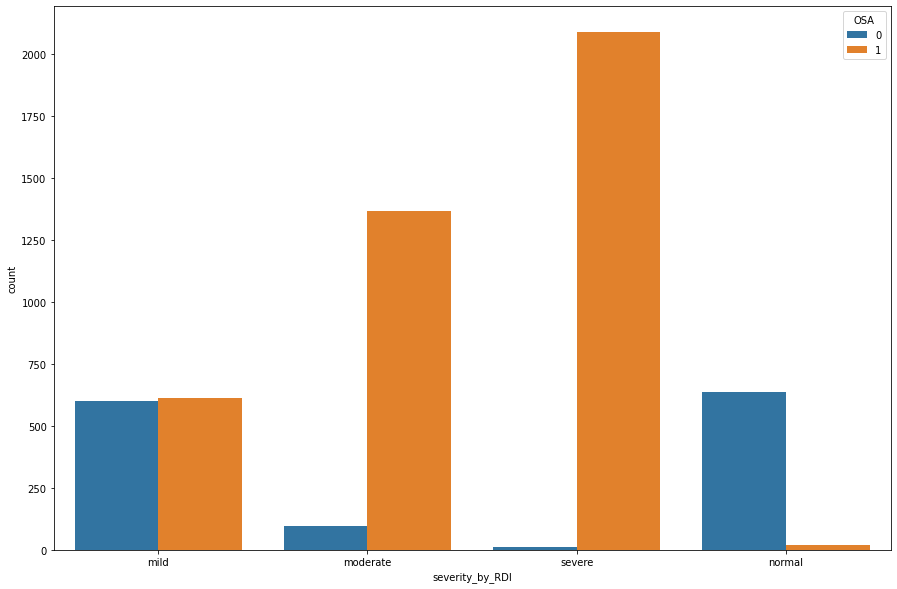

In [18]:
plt.figure(figsize=(15, 10))
sns.countplot(x='severity_by_RDI', hue='OSA', data=data_b)

In [25]:
len(data_b[(data_b['OSA'] == 1) & (data_b['severity_by_RDI'] == 'normal')])

20

In [26]:
len(data_b[(data_b['OSA'] == 0) & (data_b['severity_by_RDI'] == 'severe')])

13

In [27]:
moderate_not_osa = data_b[(data_b['OSA'] == 0) & (data_b['severity_by_RDI'] == 'moderate')]
len(moderate_not_osa)

97

In [41]:
print(len(data_b[(data_b['OSA'] == 1) & (data_b['severity_by_RDI'] == 'mild')]))
print(len(data_b[(data_b['OSA'] == 0) & (data_b['severity_by_RDI'] == 'mild')]))

612
601


<AxesSubplot:xlabel='OSA', ylabel='ODI'>

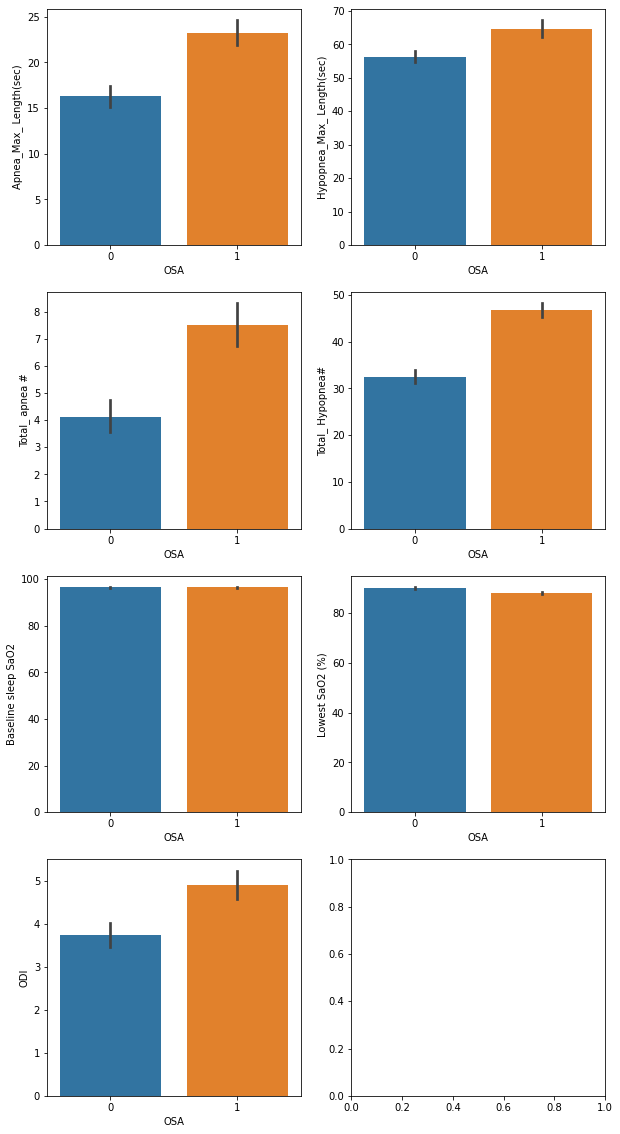

In [49]:
mild_b = data_b[data_b['severity_by_RDI'] == 'mild']
mild_a = data_a[data_a['severity_by_RDI'] == 'mild'] # plot 할 feature 중 결측치 때문에 data b에서는 제거된 것이 있어 a도 함께 사용

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, _)) = plt.subplots(4, 2, figsize=(10, 20))
sns.barplot(y='Apnea_Max_ Length(sec)', x='OSA', data=mild_b, ax=ax1)
sns.barplot(y='Hypopnea_Max_ Length(sec)', x='OSA', data=mild_b, ax=ax2)
sns.barplot(y='Total_ apnea #', x='OSA', data=mild_a, ax=ax3)
sns.barplot(y='Total_ Hypopnea#', x='OSA', data=mild_a, ax=ax4)
sns.barplot(y='Baseline sleep SaO2', x='OSA', data=mild_a, ax=ax5)
sns.barplot(y='Lowest SaO2 (%)', x='OSA', data=mild_a, ax=ax6)
sns.barplot(y='ODI', x='OSA', data=mild_b, ax=ax7)